In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

I confirm that this is my own work, except where clearly indicated.

In [2]:
data_set = pd.read_csv("train.csv")
data_set

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
20575,29366,NaN,Zimbabwe,2020-03-27,5.0,1.0
20576,29367,NaN,Zimbabwe,2020-03-28,7.0,1.0
20577,29368,NaN,Zimbabwe,2020-03-29,7.0,1.0
20578,29369,NaN,Zimbabwe,2020-03-30,7.0,1.0


In [3]:
test_for_sub = pd.read_csv("test.csv")
test_for_sub

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-19
1,2,NaN,Afghanistan,2020-03-20
2,3,NaN,Afghanistan,2020-03-21
3,4,NaN,Afghanistan,2020-03-22
4,5,NaN,Afghanistan,2020-03-23
...,...,...,...,...
12637,12638,NaN,Zimbabwe,2020-04-26
12638,12639,NaN,Zimbabwe,2020-04-27
12639,12640,NaN,Zimbabwe,2020-04-28
12640,12641,NaN,Zimbabwe,2020-04-29


In [4]:
sample_submit = pd.read_csv("submission.csv")

,Unnamed: 0,ForecastId,ConfirmedCases,Fatalities
0,0,0,153.364501,0.0
1,1,1,153.364501,0.0
2,2,2,153.364501,0.0
3,3,3,153.364501,0.0
4,4,4,153.364501,0.0
...,...,...,...,...
10100,10100,10100,0.000000,0.0
10101,10101,10101,0.000000,0.0
10102,10102,10102,0.000000,0.0
10103,10103,10103,0.000000,0.0


In [5]:
country_info = pd.read_csv("covid19countryinfo.csv")
covid_tests = pd.read_csv("covid19tests.csv")
country_info
#covid_tests

,region,country,alpha3code,alpha2code,pop,tests,testpop,density,medianage,urbanpop,...,newdeaths2,newdeaths3,recovered,critical30,critical31,critical1,critical2,critical3,casediv1m,deathdiv1m
0,NaN,Afghanistan,AFG,AF,"38,928,346",NaN,NaN,60.0,18.0,25.0,...,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,7,0.2
1,NaN,Albania,ALB,AL,"2,877,797",NaN,NaN,105.0,36.0,63.0,...,1.0,NaN,89,7,8,7,7,7,106,6.0
2,NaN,Algeria,DZA,DZ,"43,851,044",NaN,NaN,18.0,29.0,73.0,...,NaN,NaN,61,NaN,NaN,NaN,NaN,NaN,22,2.0
3,NaN,Andorra,AND,AD,"77,265",NaN,NaN,164.0,45.0,88.0,...,1.0,1.0,16,10,10,12,12,12,"5,682",207.0
4,NaN,Antigua and Barbuda,ATG,AG,"97,929",NaN,NaN,223.0,34.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Washington,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,Washington DC,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,West Virginia,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,Wisconsin,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
china_stats = country_info[country_info.country == "US"]
china_stats

,region,country,alpha3code,alpha2code,pop,tests,testpop,density,medianage,urbanpop,...,newdeaths2,newdeaths3,recovered,critical30,critical31,critical1,critical2,critical3,casediv1m,deathdiv1m
75,Guam,US,GUM,GU,"168,775",NaN,NaN,313.0,31.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,Puerto Rico,US,PRI,PR,"2,860,853",NaN,NaN,323.0,44.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,US,USA,US,"331,002,651",62657.0,5282.772093,36.0,38.0,83.0,...,232.0,488.0,"11,941","2,972","3,893","4,888","5,403","5,781",778,20.0
195,Alabama,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Alaska,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,Arizona,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,Arkansas,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,California,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,San Franciso,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,Colorado,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Possible ideas: Exclude Chinese data for a number of reasons. Add column for ratio of children to adults, add column for density, median age, urbanization.. https://www.nytimes.com/2020/04/27/opinion/coronavirus-crowds.html

In [7]:
covid_tests

,region,country,alpha3code,alpha2code,tests,positive,date,testper1m,positiveper1m
0,NaN,Argentina,ARG,AR,"4,843",966,31-Mar,107,199.0
1,NaN,Armenia,ARM,AM,"3,603",663,2-Apr,"1,221",74.0
2,NaN,Australia,AUS,AU,"277,355","5,358",3-Apr,"10,919",19.0
3,NaN,Austria,AUT,AT,"98,343","11,350",3-Apr,"11,047",101.0
4,NaN,Azerbaijan,AZE,AZ,"30,000",443,3-Apr,"3,031",15.0
...,...,...,...,...,...,...,...,...,...
106,Texas,US,USA,US,"50,679","4,669",2-Apr,"1,748",92.0
107,Washington,US,USA,US,"79,418","6,585",1-Apr,"10,429",86.0
108,NaN,Uruguay,URY,UY,"1,538",189,24-Mar,443,123.0
109,NaN,Venezuela,VEN,VE,"1,779",143,31-Mar,62,80.4


Maybe also consider number of positive tests- however that does not really indicate infection rate and may confuse the model...

Temperature data may also be a good feature

Could it also be possible to calculate the R-rate?

Right now, I will build a simple model using population density, median age, urban population, and the confirmed cases/fatalities.

In [8]:
country_info = country_info.rename(columns={"country":"Country_Region", "region":"Province_State"})
country_info

,Province_State,Country_Region,alpha3code,alpha2code,pop,tests,testpop,density,medianage,urbanpop,...,newdeaths2,newdeaths3,recovered,critical30,critical31,critical1,critical2,critical3,casediv1m,deathdiv1m
0,NaN,Afghanistan,AFG,AF,"38,928,346",NaN,NaN,60.0,18.0,25.0,...,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,7,0.2
1,NaN,Albania,ALB,AL,"2,877,797",NaN,NaN,105.0,36.0,63.0,...,1.0,NaN,89,7,8,7,7,7,106,6.0
2,NaN,Algeria,DZA,DZ,"43,851,044",NaN,NaN,18.0,29.0,73.0,...,NaN,NaN,61,NaN,NaN,NaN,NaN,NaN,22,2.0
3,NaN,Andorra,AND,AD,"77,265",NaN,NaN,164.0,45.0,88.0,...,1.0,1.0,16,10,10,12,12,12,"5,682",207.0
4,NaN,Antigua and Barbuda,ATG,AG,"97,929",NaN,NaN,223.0,34.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Washington,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,Washington DC,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,West Virginia,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,Wisconsin,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
abbrev_info = country_info.drop(['alpha3code', 'alpha2code', 'pop', 'tests', 'testpop', 'quarantine', 'schools', 'publicplace', 'gatheringlimit', 'gathering', 'nonessential', 'hospibed','smokers','sex0','sex14','sex25','sex54','sex64','sex65plus','sexratio','lung','femalelung','malelung','gdp2019','healthexp','healthperpop','fertility','avgtemp','avghumidity','firstcase','totalcases','active30','active31','active1','active2','active3','newcases30','newcases31','newcases1','newcases2','newcases3','deaths','newdeaths30','newdeaths31','newdeaths1','newdeaths2','newdeaths3','recovered','critical30','critical31','critical1','critical2','critical3','casediv1m','deathdiv1m'], axis=1)
abbrev_info
                                 
                                 

,Province_State,Country_Region,density,medianage,urbanpop
0,NaN,Afghanistan,60.0,18.0,25.0
1,NaN,Albania,105.0,36.0,63.0
2,NaN,Algeria,18.0,29.0,73.0
3,NaN,Andorra,164.0,45.0,88.0
4,NaN,Antigua and Barbuda,223.0,34.0,26.0
...,...,...,...,...,...
244,Washington,US,NaN,NaN,NaN
245,Washington DC,US,NaN,NaN,NaN
246,West Virginia,US,NaN,NaN,NaN
247,Wisconsin,US,NaN,NaN,NaN


In [10]:
us_data = data_set[data_set.Province_State == 'Virginia']
us_data

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
19110,27301,Virginia,US,2020-01-22,0.0,0.0
19111,27302,Virginia,US,2020-01-23,0.0,0.0
19112,27303,Virginia,US,2020-01-24,0.0,0.0
19113,27304,Virginia,US,2020-01-25,0.0,0.0
19114,27305,Virginia,US,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
19175,27366,Virginia,US,2020-03-27,607.0,10.0
19176,27367,Virginia,US,2020-03-28,740.0,13.0
19177,27368,Virginia,US,2020-03-29,890.0,20.0
19178,27369,Virginia,US,2020-03-30,1020.0,15.0


In [11]:
data_set.dtypes

Id                  int64
Province_State     object
Country_Region     object
Date               object
ConfirmedCases    float64
Fatalities        float64
dtype: object

In [12]:
data_set['Date'] = pd.to_datetime(data_set['Date'])
data_set.dtypes

Id                         int64
Province_State            object
Country_Region            object
Date              datetime64[ns]
ConfirmedCases           float64
Fatalities               float64
dtype: object

In [13]:
test_for_sub['Date'] = pd.to_datetime(test_for_sub['Date'])
test_for_sub.dtypes

ForecastId                 int64
Province_State            object
Country_Region            object
Date              datetime64[ns]
dtype: object

In [14]:
test_for_sub[test_for_sub.Country_Region == 'US']

,ForecastId,Province_State,Country_Region,Date
9632,9633,Alabama,US,2020-03-19
9633,9634,Alabama,US,2020-03-20
9634,9635,Alabama,US,2020-03-21
9635,9636,Alabama,US,2020-03-22
9636,9637,Alabama,US,2020-03-23
...,...,...,...,...
11949,11950,Wyoming,US,2020-04-26
11950,11951,Wyoming,US,2020-04-27
11951,11952,Wyoming,US,2020-04-28
11952,11953,Wyoming,US,2020-04-29


In [15]:
new_data_set = data_set.merge(abbrev_info, on=['Country_Region', 'Province_State'])
new_data_set

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,density,medianage,urbanpop
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,60.0,18.0,25.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0,60.0,18.0,25.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0,60.0,18.0,25.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0,60.0,18.0,25.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0,60.0,18.0,25.0
...,...,...,...,...,...,...,...,...,...
16445,29366,NaN,Zimbabwe,2020-03-27,5.0,1.0,38.0,18.7,38.4
16446,29367,NaN,Zimbabwe,2020-03-28,7.0,1.0,38.0,18.7,38.4
16447,29368,NaN,Zimbabwe,2020-03-29,7.0,1.0,38.0,18.7,38.4
16448,29369,NaN,Zimbabwe,2020-03-30,7.0,1.0,38.0,18.7,38.4


In [87]:
mask = (new_data_set['Date'] >= '2020-03-19') & (data_set['Date'] <= '2020-03-31')
val = new_data_set.loc[mask]
val

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,density,medianage,urbanpop
57,58,NaN,Afghanistan,2020-03-19,22.0,0.0,60.0,18.0,25.0
58,59,NaN,Afghanistan,2020-03-20,24.0,0.0,60.0,18.0,25.0
59,60,NaN,Afghanistan,2020-03-21,24.0,0.0,60.0,18.0,25.0
60,61,NaN,Afghanistan,2020-03-22,40.0,1.0,60.0,18.0,25.0
61,62,NaN,Afghanistan,2020-03-23,40.0,1.0,60.0,18.0,25.0
...,...,...,...,...,...,...,...,...,...
16445,29366,NaN,Zimbabwe,2020-03-27,5.0,1.0,38.0,18.7,38.4
16446,29367,NaN,Zimbabwe,2020-03-28,7.0,1.0,38.0,18.7,38.4
16447,29368,NaN,Zimbabwe,2020-03-29,7.0,1.0,38.0,18.7,38.4
16448,29369,NaN,Zimbabwe,2020-03-30,7.0,1.0,38.0,18.7,38.4


In [88]:
masktrain = (new_data_set['Date'] < '2020-03-19')
for_train = new_data_set.loc[masktrain]
for_train

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,density,medianage,urbanpop
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,60.0,18.0,25.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0,60.0,18.0,25.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0,60.0,18.0,25.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0,60.0,18.0,25.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0,60.0,18.0,25.0
...,...,...,...,...,...,...,...,...,...
16432,29353,NaN,Zimbabwe,2020-03-14,0.0,0.0,38.0,18.7,38.4
16433,29354,NaN,Zimbabwe,2020-03-15,0.0,0.0,38.0,18.7,38.4
16434,29355,NaN,Zimbabwe,2020-03-16,0.0,0.0,38.0,18.7,38.4
16435,29356,NaN,Zimbabwe,2020-03-17,0.0,0.0,38.0,18.7,38.4


Okay.. Now all I need to do is train a model on this. How? I do not know... yet. I will try to feed the data as-is to a support vector regression model

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
        elif df.dtypes[c] == float:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [124]:
new_test12 = test_for_sub.merge(abbrev_info, on=['Country_Region', 'Province_State'], how='left')
val_train_labels = new_data_set.drop(['Id','Province_State', 'Country_Region', 'density', 'medianage', 'urbanpop'], axis=1)
enc = new_data_set.drop(['ConfirmedCases', 'Fatalities'], axis=1)
rep_test_mask = new_test12['Date'] > '2020-03-31'
test_no_repeats = new_test12.loc[rep_test_mask]
frames = [enc, new_test12]

encode_set = pd.concat(frames, axis=0, join='outer', ignore_index=False)
encoded_data = FunLabelEncoder(encode_set)
encoded_data

,Id,Province_State,Country_Region,Date,density,medianage,urbanpop,ForecastId
0,0,125,0,2020-01-22,103,6,8,12642
1,7291,125,0,2020-01-23,103,6,8,12642
2,14092,125,0,2020-01-24,103,6,8,12642
3,14593,125,0,2020-01-25,103,6,8,12642
4,14814,125,0,2020-01-26,103,6,8,12642
...,...,...,...,...,...,...,...,...
12637,16450,125,172,2020-04-26,77,7,24,2933
12638,16450,125,172,2020-04-27,77,7,24,2934
12639,16450,125,172,2020-04-28,77,7,24,2936
12640,16450,125,172,2020-04-29,77,7,24,2937


In [125]:
mask = (encoded_data['Date'] == '2020-03-19')
encoded_data.loc[mask]

,Id,Province_State,Country_Region,Date,density,medianage,urbanpop,ForecastId
57,14893,125,0,2020-03-19,103,6,8,12642
127,4124,125,1,2020-03-19,4,37,51,12642
197,11765,125,2,2020-03-19,32,28,62,12642
267,14576,125,3,2020-03-19,29,47,76,12642
337,14878,125,5,2020-03-19,43,34,10,12642
...,...,...,...,...,...,...,...,...
12427,16450,125,168,2020-03-19,120,26,36,2700
12470,16450,125,169,2020-03-19,66,29,69,2748
12513,16450,125,170,2020-03-19,65,31,22,2796
12556,16450,125,171,2020-03-19,53,6,31,2843


In [161]:
mask = (encoded_data['Date'] >= '2020-03-19') & (encoded_data['Date'] <= '2020-03-31')
testing = encoded_data.loc[mask]
testing = testing[testing['ForecastId'] == 12642]

vmasklabs = (val_train_labels['Date'] >= '2020-03-19') & (val_train_labels['Date'] <= '2020-03-31')
vallabs = val_train_labels.loc[vmasklabs]
test_labels= vallabs.drop(['Date'], axis=1)
test_labels

,ConfirmedCases,Fatalities
57,22.0,0.0
58,24.0,0.0
59,24.0,0.0
60,40.0,1.0
61,40.0,1.0
...,...,...
16445,5.0,1.0
16446,7.0,1.0
16447,7.0,1.0
16448,7.0,1.0


In [129]:
masktrain = (encoded_data['Date'] < '2020-03-19')
training = encoded_data.loc[masktrain]

tmasklabs = (val_train_labels['Date'] < '2020-03-19')
tlabels = val_train_labels.loc[tmasklabs]
train_labels = tlabels.drop(['Date'], axis=1)
train_labels

,ConfirmedCases,Fatalities
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
16432,0.0,0.0
16433,0.0,0.0
16434,0.0,0.0
16435,0.0,0.0


In [177]:
training['Date'] = training['Date'].astype('int64')
testing['Date'] = testing['Date'].astype('int64')
train_for_model = training
test_for_model = testing

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Warning can be ignored because I WANT to assign on a copy. This is fine because I can rerun.

In [178]:
masksubmit = (encoded_data['Date'] >= '2020-03-19')
test_set = encoded_data.loc[masksubmit]
test_set['Date'] = test_set['Date'].astype('int64')
test_set = test_set[test_set['ForecastId'] != 12642]
test_set

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,Province_State,Country_Region,Date,density,medianage,urbanpop,ForecastId
0,16450,125,0,1584576000000000000,103,6,8,0
1,16450,125,0,1584662400000000000,103,6,8,3754
2,16450,125,0,1584748800000000000,103,6,8,4865
3,16450,125,0,1584835200000000000,103,6,8,5976
4,16450,125,0,1584921600000000000,103,6,8,7087
...,...,...,...,...,...,...,...,...
12637,16450,125,172,1587859200000000000,77,7,24,2933
12638,16450,125,172,1587945600000000000,77,7,24,2934
12639,16450,125,172,1588032000000000000,77,7,24,2936
12640,16450,125,172,1588118400000000000,77,7,24,2937


Warning can be ignored because I WANT to assign on a copy. This is fine because I can rerun.

In [179]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

model = SVR()
wrapper = MultiOutputRegressor(model)

wrapper.fit(train_for_model, train_labels)

MultiOutputRegressor(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                   epsilon=0.1, gamma='scale', kernel='rbf',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False),
                     n_jobs=None)

In [180]:
preds = wrapper.predict(test_for_model)
preds

array([[0.1023184 , 0.1000088 ],
       [0.1023982 , 0.10000907],
       [0.10247801, 0.10000934],
       ...,
       [0.10311647, 0.10001146],
       [0.10319628, 0.10001173],
       [0.10327609, 0.10001199]])

In [181]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_labels, preds)
mse

43777310.9772085

In [182]:
rmse = np.sqrt(mse)
rmse

6616.442471389629

I guess this will be our baseline for performance. 

In [183]:
from sklearn.metrics import explained_variance_score

evs = explained_variance_score(test_labels, preds)
evs

2.9959121849998382e-09

The best possible explained variance score is 1.0 with lower values being worse. As one can see 2.9959121849998382e-09 is an extremely low value. Meaning, the model does not perform very well.

Perhaps another method would be to query for each country/region separately and forecast and test from there. However it will then be difficult to compare the different country features such as urban population, median age, and population density. According to MachineLearningMastery, this can be done by refitting the a cloned model on multiple "chunked" stratifications from the data set. https://machinelearningmastery.com/how-to-develop-machine-learning-models-for-multivariate-multi-step-air-pollution-time-series-forecasting/

In [184]:
# fit a single model
def fit_model(model, X, y):
    # clone the model configuration
    local_model = clone(model)
    # fit the model
    local_model.fit(X, y)
    return local_model

So let's try Support Vector Regression again but use a different model for every region/country

In [186]:
import pickle
from numpy import load
from numpy import loadtxt
from numpy import nan
from numpy import isnan
from numpy import count_nonzero
from numpy import unique
from numpy import array
from sklearn.base import clone

def models_by_country_state(model, dataTrain, dataTest, trlabels, telabels):
    models = []
    rmses = []
    evscores = []
    countries = dataTrain.Country_Region.unique()
    i = 0
    for country in countries:
        i = i+1
        states = dataTrain[dataTrain['Country_Region'] == country].Province_State.unique()
        j = 0
        for state in states:
            j= j+1
            train = dataTrain[(dataTrain['Country_Region'] == country) & (dataTrain['Province_State'] == state)]
            #train = dataTrain
            #train_labels = train.drop(['Id','Province_State', 'Country_Region', 'Date', 'density', 'medianage', 'urbanpop'], axis=1)
            train_labels = trlabels[(trlabels['Country_Region'] == country) & (trlabels['Province_State'] == state)]
            y_train = train_labels.drop(['Province_State', 'Country_Region', 'Date'], axis=1)
            train_feed = train
            local_model = fit_model(model, train_feed, y_train)
            
            test = dataTest[(dataTest['Country_Region'] == country) & (dataTest['Province_State'] == state)]
            #test = dataTest
            #test_labels = test.drop(['Id','Province_State', 'Country_Region', 'Date', 'density', 'medianage', 'urbanpop'], axis=1)
            test_labels = telabels[(telabels['Country_Region'] == country) & (telabels['Province_State'] == state)]
            y_test = test_labels.drop(['Province_State', 'Country_Region', 'Date'], axis=1)
            #test_feed = test.drop(['ConfirmedCases', 'Fatalities'], axis=1)
            test_feed = test
            preds = local_model.predict(test_feed)
            rmse = np.sqrt(mean_squared_error(y_test, preds))
            evs = explained_variance_score(y_test, preds)
            #model_label = str(country) + str(state)
            #models.append((model_label, local_model))
            rmses.append(rmse)
            evscores.append(evs)
    return rmses, evscores


   

In [187]:
labels_country_prov = new_data_set.drop(['Id', 'density', 'medianage', 'urbanpop'], axis=1)
labels_country_prov
trlabels_country_prov = labels_country_prov.loc[tmasklabs]
telabels_country_prov = labels_country_prov.loc[vmasklabs]
telabels_country_prov['Province_State'] = testing['Province_State']
telabels_country_prov['Country_Region'] = testing['Country_Region']
trlabels_country_prov['Province_State'] = training['Province_State']
trlabels_country_prov['Country_Region'] = training['Country_Region']
testing.dtypes

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Id                int64
Province_State    int64
Country_Region    int64
Date              int64
density           int64
medianage         int64
urbanpop          int64
ForecastId        int64
dtype: object

Warning can be ignored because I WANT to assign on a copy. This is fine because I can rerun.

In [188]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

model = SVR()
wrapper = MultiOutputRegressor(model)

#wrapper.fit(train_for_model, train_labels)

# will hold a unique model for every country-state combination
rmses, evs = models_by_country_state(wrapper, training, testing, trlabels_country_prov, telabels_country_prov)
rmses

[69.02213892288272,
 112.26469154302143,
 271.693332773565,
 165.80492238967113,
 3.4759030104666215,
 388.593290558221,
 226.57888647598142,
 4631.953673019752,
 109.94899562196969,
 5.8537622132588725,
 298.8891696456734,
 27.822954121347756,
 15.290683222574609,
 67.74000691893424,
 5125.622281285188,
 1.2403473458920846,
 3.7279087414404133,
 1.8452384362107381,
 40.33223395451222,
 162.747642317177,
 2213.805258049315,
 75.01776188210853,
 186.62608645190056,
 113.20801242635079,
 3.0064034224404312,
 61.777274145009414,
 66.21818474498295,
 1.978051545372091,
 2.261721604306024,
 1067.9262676157743,
 292.6417025492755,
 4157.6736617584875,
 362.1659450388117,
 6.783831627843979,
 37.97525343031593,
 161.48135346985708,
 70.65961394593194,
 365.74843171392604,
 67.06628310117713,
 110.60975371291254,
 1432.1832858047276,
 93.14974271531995,
 4.902628259259035,
 1349.4505428801442,
 64.66451682714874,
 9.0454620626729,
 5.571217240286142,
 404.2579269416532,
 980.2395843799524,
 34

In [189]:
avg_rmse = sum(rmses)/len(rmses)
avg_rmse

1412.4421602030582

In [190]:
evs

[2.8288890030481184e-07,
 4.309933147594869e-07,
 1.9814162666165203e-07,
 6.655990703041681e-08,
 0.5000003190380273,
 3.875354511184703e-07,
 6.347590408850579e-08,
 3.583476909652106e-08,
 6.926150575292667e-07,
 0.5000000558378,
 3.2674625449757855e-07,
 2.75289804840817e-07,
 0.500000010033455,
 3.1348161000366304e-07,
 1.1701566993149726e-08,
 0.5,
 0.5000000957947892,
 0.5000042058661044,
 5.0155078812341714e-08,
 4.517608565013376e-08,
 9.709936077406667e-09,
 1.3500647860764659e-07,
 6.343026253130546e-07,
 3.322187264176435e-08,
 0.0,
 0.5000003042521215,
 8.153536174004827e-08,
 0.5000003544867593,
 0.5,
 8.22680984446933e-09,
 1.2773034158142238e-07,
 3.7069224452901395e-05,
 1.7235588345432262e-08,
 0.5000000482173526,
 6.70218558429525e-08,
 4.733788128152838e-08,
 2.6073410319682466e-08,
 5.5503877105511634e-08,
 3.5722536928517457e-08,
 4.1679908802105814e-08,
 9.582887094961023e-09,
 0.5000001826622931,
 0.5000000679666801,
 4.419339066918937e-08,
 1.4403965658049689e-

In [191]:
avg_evs = sum(evs)/len(evs)
avg_evs

0.1297877006434594

Hello! Hello!

In [192]:
les_data = data_set[data_set.Country_Region == 'China']
les_data

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
3430,4901,Anhui,China,2020-01-22,1.0,0.0
3431,4902,Anhui,China,2020-01-23,9.0,0.0
3432,4903,Anhui,China,2020-01-24,15.0,0.0
3433,4904,Anhui,China,2020-01-25,39.0,0.0
3434,4905,Anhui,China,2020-01-26,60.0,0.0
...,...,...,...,...,...,...
5735,8166,Zhejiang,China,2020-03-27,1247.0,1.0
5736,8167,Zhejiang,China,2020-03-28,1251.0,1.0
5737,8168,Zhejiang,China,2020-03-29,1254.0,1.0
5738,8169,Zhejiang,China,2020-03-30,1255.0,1.0


No handles with labels found to put in legend.


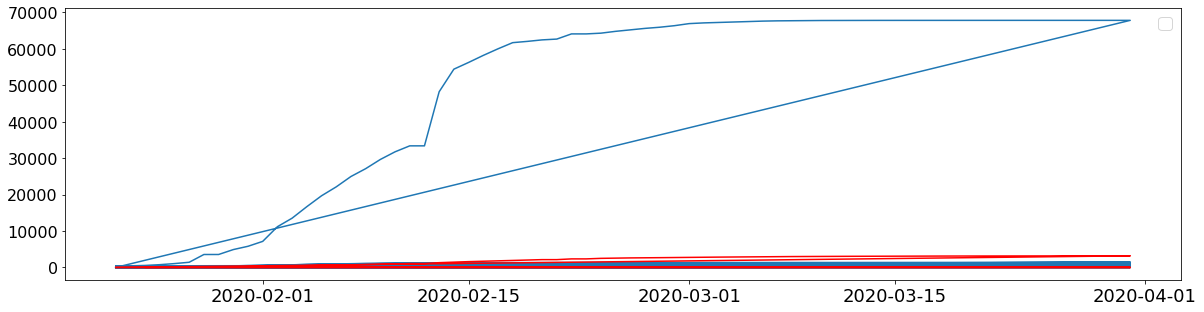

In [193]:
plt.figure(figsize=(20, 5))
plt.plot(les_data.Date, les_data['ConfirmedCases'])
plt.plot(les_data.Date, les_data['Fatalities'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

Not sure how to fix the handles but it seems to be fine for its purpose

No handles with labels found to put in legend.


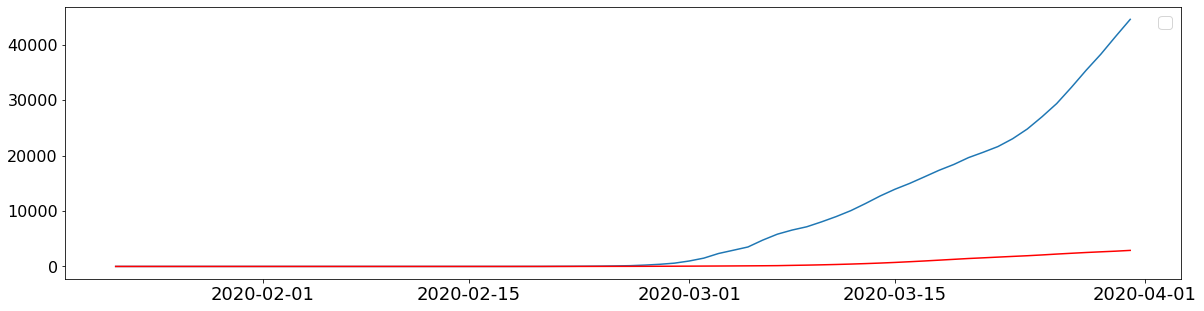

In [194]:
iran_data = data_set[data_set.Country_Region == 'Iran']
iran_data

plt.figure(figsize=(20, 5))
plt.plot(iran_data.Date, iran_data['ConfirmedCases'])
plt.plot(iran_data.Date, iran_data['Fatalities'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

Not sure how to fix the handles but it seems to be fine for its purpose

When comparing data between China and Iran one can see that the growth rate of cases between the two of them are completely different. Iran seems to have had exponential growth while China seems to have had logistic growth, being able to decrease the incremental amount of confirmed cases.

This means that one type of regression model may not be able to fit data for every country. So it might be easier to try a few more different types of models to see what could fit the data for most of the given countries best.

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

model = LinearRegression()
wrapper = MultiOutputRegressor(model)

#wrapper.fit(train_for_model, train_labels)

#all_models will hold a unique model for every country-state combination
rmses, evs = models_by_country_state(wrapper, training, testing, trlabels_country_prov, telabels_country_prov)
rmses

[62.74431535859865,
 96.08803362242693,
 248.84053505933156,
 170.5730401067787,
 3.2554005998006814,
 355.796257325025,
 212.22223097720317,
 4281.2185943506765,
 100.64303510996464,
 6.047720769503147,
 180.91563617759758,
 25.02223004609713,
 15.156681758547418,
 54.670769593312485,
 4588.471793681857,
 1.2403473458920846,
 3.592641162715341,
 1.3319852936766314,
 35.97043558429776,
 153.31846083680833,
 2019.2434317854309,
 57.59095880084459,
 168.48293985737646,
 110.16070312513227,
 3.0064034224404312,
 56.59126561619121,
 64.36515819051277,
 1.8304089325024566,
 2.261721604306024,
 1026.6602292966413,
 222.15315757793834,
 20540.85299491082,
 347.15234347684816,
 6.665478202021072,
 37.20026986550561,
 148.65751009378613,
 69.93876315223193,
 344.1570260098022,
 65.72910718708299,
 99.9397054455124,
 1329.0306458529828,
 84.61139654201881,
 4.811248729566791,
 997.0228475244162,
 224.9342039860791,
 9.052324623029554,
 5.571217240286142,
 399.36506392552184,
 960.6354822692508,


In [198]:
evs

[0.01624950290244337,
 0.04485964820974253,
 0.04326303702006806,
 -0.06426460508013099,
 0.5127951898479766,
 0.050695358734262286,
 0.01357659306872655,
 0.02256447367120895,
 0.0434432312360481,
 0.447624263409102,
 0.16704107662319734,
 0.05007843835246906,
 0.5039593189630807,
 0.03336933439632023,
 0.031406137976033865,
 0.5,
 0.5169055894539091,
 0.5634093577974717,
 0.027875595896935446,
 0.011531406112032239,
 0.03193789762863214,
 0.10177804924465228,
 0.05232923409214729,
 0.006765382004825571,
 0.0,
 0.5253088125438046,
 0.004717261329237776,
 0.5211661121912681,
 0.5,
 0.006755909261885296,
 0.06422066199479337,
 -63939205.72587152,
 0.007685583647279892,
 0.5030294514096789,
 0.004291726905747695,
 0.01709794669091874,
 0.0017182892833995655,
 0.010936034141243334,
 0.007106200413786845,
 0.02125563464621938,
 0.01465773636784179,
 0.5317503391299127,
 0.5057976991284738,
 0.07793267326558478,
 0.31286195242688525,
 0.5007337097045135,
 0.5,
 0.002677015658258952,
 0.0066

In [199]:
avg_evs = sum(evs)/len(evs)
avg_evs

-272081.57040645584

Negative variance could be seen as the regression overfitting or oversimplifying the data.

In [201]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

model = RandomForestRegressor(max_depth=2, random_state=0)
wrapper = MultiOutputRegressor(model)

#wrapper.fit(train_for_model, train_labels)

#all_models will hold a unique model for every country-state combination
rmses, evs = models_by_country_state(wrapper, training, testing, trlabels_country_prov, telabels_country_prov)
rmses

[56.850244540138114,
 78.93320638605572,
 233.91377340026835,
 144.55623070146572,
 2.9612887007569473,
 348.77534899573106,
 178.32369721261648,
 3746.0143983455605,
 94.66909181042747,
 5.338563621280684,
 140.98301632396522,
 20.000186077446344,
 14.245956511343032,
 38.56208121577864,
 4378.885761599473,
 1.2403473458920846,
 2.8025620146847503,
 1.270977818604485,
 33.98659771830378,
 142.99567036140428,
 2013.3563558710312,
 35.2265887557414,
 135.5226901213977,
 102.5091884249332,
 3.0064034224404312,
 41.439909380005616,
 60.89559451035215,
 1.3655275114824248,
 2.261721604306024,
 943.963700055666,
 238.88263298916726,
 991.0552917477488,
 314.6303242478728,
 6.3354961556662275,
 35.95112297981268,
 134.67607083521722,
 67.8280971960055,
 324.12885666471095,
 63.74372418576535,
 81.97518583563152,
 1179.0748695964785,
 59.16114411568562,
 4.386196880775312,
 739.1402004785532,
 8.913352982216281,
 8.767520480992069,
 5.571217240286142,
 392.9778613504054,
 925.179529143419,
 2

In [202]:
avg_evs = sum(evs)/len(evs)
avg_evs

0.13829787234042554

In [231]:
avg_rmse = sum(rmses)/len(rmses)
avg_rmse

1088.1636409501116

In [220]:
def make_submission_df(model, dataTrain, dataTest, trlabels):
    models = []
    rmses = []
    evscores = []
    conf_cases = []
    fatalities = []
    prev_model = model
    countries = dataTest.Country_Region.unique()
    i = 0
    for country in countries:
        i = i+1
        states = dataTest[dataTest['Country_Region'] == country].Province_State.unique()
        j = 0
        for state in states:
            j= j+1
            #train = dataTrain[(dataTrain['Country_Region'] == country) & (dataTrain['Province_State'] == state)]
            #train_labels = train.drop(['Id','Province_State', 'Country_Region', 'Date', 'density', 'medianage', 'urbanpop'], axis=1)
            #train_feed = train.drop(['ConfirmedCases', 'Fatalities'], axis=1)
            #local_model = fit_model(model, train_feed, train_labels)
            
            train = dataTrain[(dataTrain['Country_Region'] == country) & (dataTrain['Province_State'] == state)]
            #train = dataTrain
            #train_labels = train.drop(['Id','Province_State', 'Country_Region', 'Date', 'density', 'medianage', 'urbanpop'], axis=1)
            train_labels = trlabels[(trlabels['Country_Region'] == country) & (trlabels['Province_State'] == state)]
            y_train = train_labels.drop(['Province_State', 'Country_Region', 'Date'], axis=1)
            train_feed = train
            if len(train_feed['Country_Region']) > 0:
                local_model = fit_model(model, train_feed, y_train)
                prev_model = local_model
            else:
                local_model = prev_model
            
            test = dataTest[(dataTest['Country_Region'] == country) & (dataTest['Province_State'] == state)]
            #test_labels = test.drop(['Id','Province_State', 'Country_Region', 'Date', 'density', 'medianage', 'urbanpop'], axis=1)
            #test_feed = test.drop(['ConfirmedCases', 'Fatalities'], axis=1)
            preds = local_model.predict(test)
            conf_cases.append(preds[:,0])
            fatalities.append(preds[:,1])
    return conf_cases, fatalities, i, j

In [221]:
train_val = [training, testing]
train_val_combo = pd.concat(train_val, axis=0, join='outer', ignore_index=False)
train_val_combo
countries = test_set.Country_Region.unique()
i = 0
for country in countries:
    i+=1
    states = test_set[test_set['Country_Region'] == country].Province_State.unique()
    for state in states:
        j=0
i

173

In [222]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

model = RandomForestRegressor(max_depth=2, random_state=0)
wrapper = MultiOutputRegressor(model)

#new_test3 = test_for_sub.merge(abbrev_info, on=['Country_Region', 'Province_State'], how='left')
#test_set = FunLabelEncoder(new_test3)
#test_set['Date'] = test_set['Date'].astype('int64')
conf_cases,fatalities, i, j = make_submission_df(wrapper, training, test_set, trlabels_country_prov)
x= i*j
x

173

In [223]:
test_set

,Id,Province_State,Country_Region,Date,density,medianage,urbanpop,ForecastId
0,16450,125,0,1584576000000000000,103,6,8,0
1,16450,125,0,1584662400000000000,103,6,8,3754
2,16450,125,0,1584748800000000000,103,6,8,4865
3,16450,125,0,1584835200000000000,103,6,8,5976
4,16450,125,0,1584921600000000000,103,6,8,7087
...,...,...,...,...,...,...,...,...
12637,16450,125,172,1587859200000000000,77,7,24,2933
12638,16450,125,172,1587945600000000000,77,7,24,2934
12639,16450,125,172,1588032000000000000,77,7,24,2936
12640,16450,125,172,1588118400000000000,77,7,24,2937


In [224]:
val

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,density,medianage,urbanpop
57,58,NaN,Afghanistan,2020-03-19,22.0,0.0,60.0,18.0,25.0
58,59,NaN,Afghanistan,2020-03-20,24.0,0.0,60.0,18.0,25.0
59,60,NaN,Afghanistan,2020-03-21,24.0,0.0,60.0,18.0,25.0
60,61,NaN,Afghanistan,2020-03-22,40.0,1.0,60.0,18.0,25.0
61,62,NaN,Afghanistan,2020-03-23,40.0,1.0,60.0,18.0,25.0
...,...,...,...,...,...,...,...,...,...
16445,29366,NaN,Zimbabwe,2020-03-27,5.0,1.0,38.0,18.7,38.4
16446,29367,NaN,Zimbabwe,2020-03-28,7.0,1.0,38.0,18.7,38.4
16447,29368,NaN,Zimbabwe,2020-03-29,7.0,1.0,38.0,18.7,38.4
16448,29369,NaN,Zimbabwe,2020-03-30,7.0,1.0,38.0,18.7,38.4


In [225]:
training

,Id,Province_State,Country_Region,Date,density,medianage,urbanpop,ForecastId
0,0,125,0,1579651200000000000,103,6,8,12642
1,7291,125,0,1579737600000000000,103,6,8,12642
2,14092,125,0,1579824000000000000,103,6,8,12642
3,14593,125,0,1579910400000000000,103,6,8,12642
4,14814,125,0,1579996800000000000,103,6,8,12642
...,...,...,...,...,...,...,...,...
16432,14039,125,172,1584144000000000000,77,7,24,12642
16433,14040,125,172,1584230400000000000,77,7,24,12642
16434,14041,125,172,1584316800000000000,77,7,24,12642
16435,14042,125,172,1584403200000000000,77,7,24,12642


In [228]:
to_submit = pd.DataFrame(columns= sample_submit.columns)
#to_submit.columns= sample_submit.columns
ids = []
i = 1
cases = []
for caselist in conf_cases:
    for case in caselist:
        ids.append(i)
        cases.append(case)
        i+=1

fatals = []
for fatelist in fatalities:
    for fate in fatelist:
        fatals.append(fate)

to_submit['ConfirmedCases'] = cases
to_submit['Fatalities'] = fatals
to_submit['ForecastId'] = ids
to_submit.drop(['Unnamed: 0'], inplace=True, axis=1)
to_submit

,ForecastId,ConfirmedCases,Fatalities
0,0,21.106667,0.0
1,1,21.106667,0.0
2,2,21.106667,0.0
3,3,21.106667,0.0
4,4,21.106667,0.0
...,...,...,...
12637,12637,0.000000,0.0
12638,12638,0.000000,0.0
12639,12639,0.000000,0.0
12640,12640,0.000000,0.0


In [230]:
to_submit.to_csv("submission.csv", index=False)